# EPS 109 "Computer Simulations in Earth and Planetary Science"
### Instructor: Burkhard Militzer
### Combined lab and homework assignment 3: part 3


From bCourses, download the files\
'x_positions_2018.txt', \
'x_positions_2019.txt', \
'x_positions_2020.txt', \
'x_positions_2021.txt', \
'x_positions_2022.txt', \
'x_positions_2022.txt', \
'submissions_2018.zip', \
'submissions_2019.zip', \
'submissions_2020.zip', \
'submissions_2021.zip', \
'submissions_2022.zip', \
'submissions_2023.zip'

In part 2, you plotted the standard deviations for all datasets that students submitted this year. The deviations between guesses and solutions were the Y values, while from left to right the results from one student after the other were displayed.

Now create a similar plot for the 50 submissions from 2018, another one for the 51 submissions from 2019, one for the 63 submissions from 2020, and separate plots the 2021, 2022 and 2023 submissions. Then combine the 2018, 2019, 2020, 2021, 2022 and 2023 curves into one diagram. Calculate and compare the standard deviation of every year.

Write a discussion of one paragraph or more about the question which class guessed more accurately or more reliably and what may have gone wrong in various years. While one cannot determine this for sure, please come up with your personal hypotheses. You were the first year ever to be given sheets of paper to write down your guesses. Did this improve the overall quality of your class' guesses?

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


In [55]:
def mapfiles_todata(all_files, years,  file_type = 'txt'):                           #Create function that takes unread data and read it all. Returns same dim array, but full of data/
    len_data = len(all_files)                                              #Note: data is not rectangular!!!
    all_data = {}
    for i, file_row in enumerate(all_files):
        row = []
        for j, file in enumerate(file_row):
            row.append(np.loadtxt(file))
        all_data[years[i]] = row

    return all_data


In [56]:
subyears = ['2023', '2022', '2021', '2020', '2019', '2018']     #The years that are important

all_student_files = []
truths_dict = {}

for year in subyears:
    files = glob.glob(f'submissions_{year}/*.txt')
    #print(files)
    all_student_files.append(files)                    #Gives us a 3d list of some obscure shape(non-uniform), should have len 6 for all 6 years in interest
    truths_dict[year] = np.loadtxt(f'x_positions_{year}.txt')                   #Will allow for easy pulling of truth data
#print(all_student_files)
#print(truths_dict)
all_data = mapfiles_todata(all_student_files, years = subyears)
#print(all_data['2020'])
#print(len(all_data['2023']))
diff_dict = {}
stds_dict = {}
for i in range(6):
    year = subyears[i]
    given_year_truth_vals = truths_dict[year]
    #print(given_year_truth_vals)
    current_years_guesses = all_data[year]
    #print(current_years_guesses)
    num_studs = len(current_years_guesses)
    class_diff = []
    class_stds = []
    for j in range(num_studs):
        #print(current_years_guesses[j])
        ind_diffs = current_years_guesses[j] - given_year_truth_vals
        #print(ind_diffs)
        class_diff.append(ind_diffs)
        std = sum(ind_diffs**2)/num_studs
        class_stds.append(std)
    diff_dict[year] = class_diff
    stds_dict[year] = class_stds



    


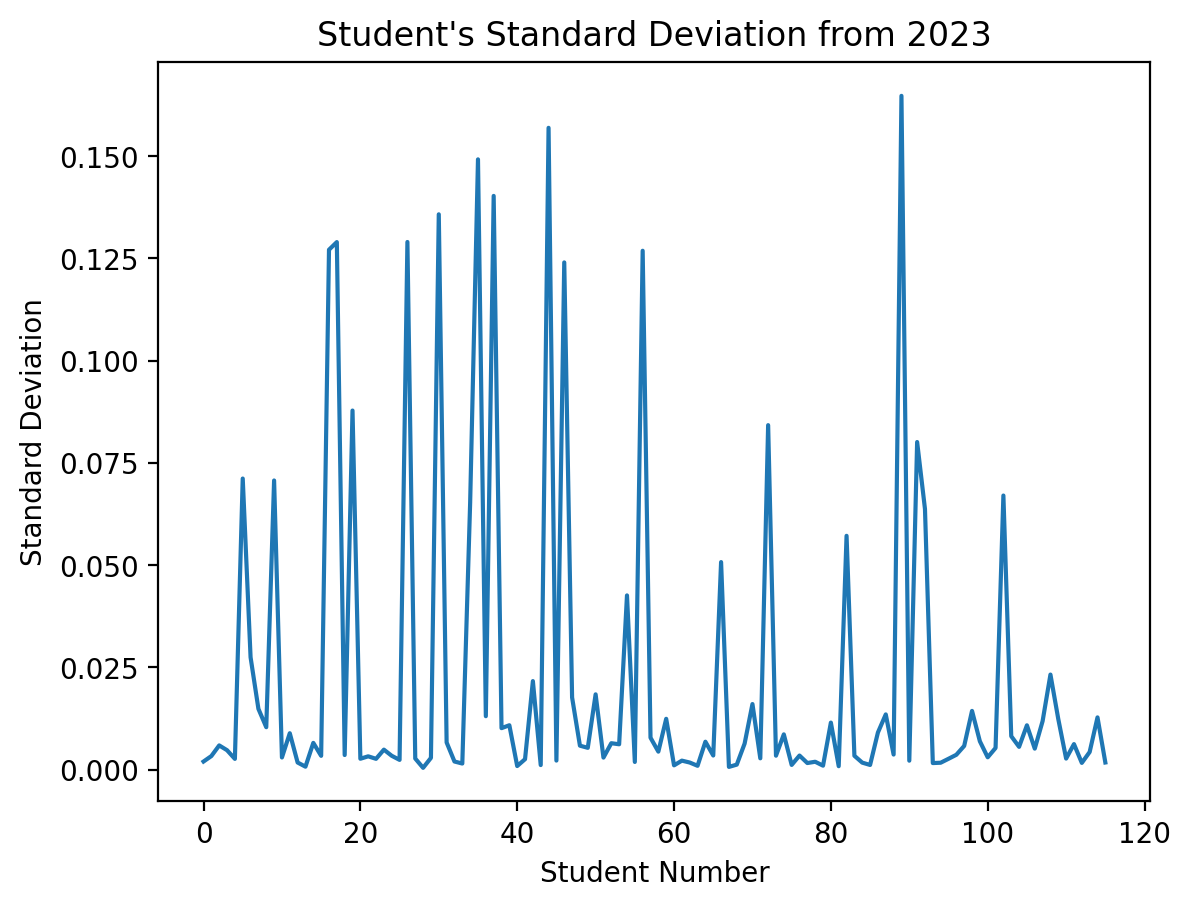

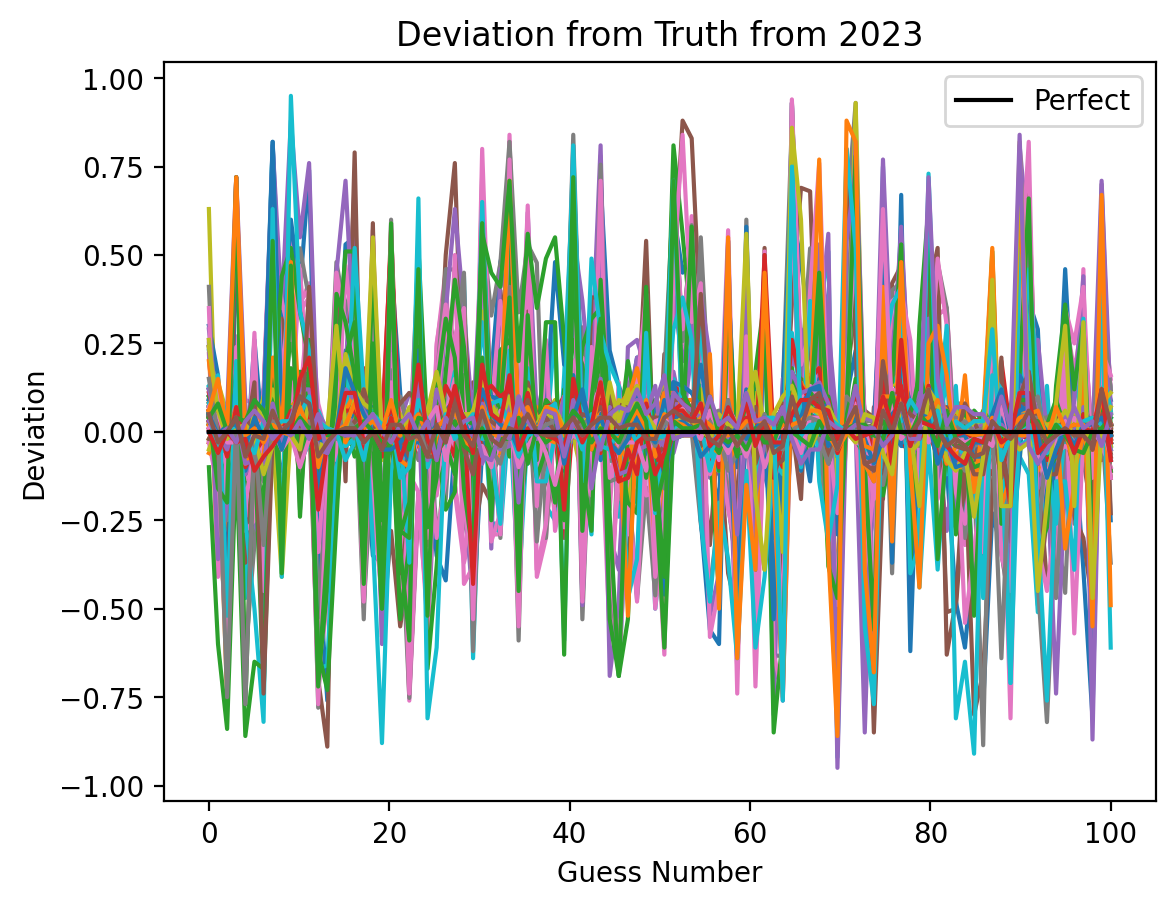

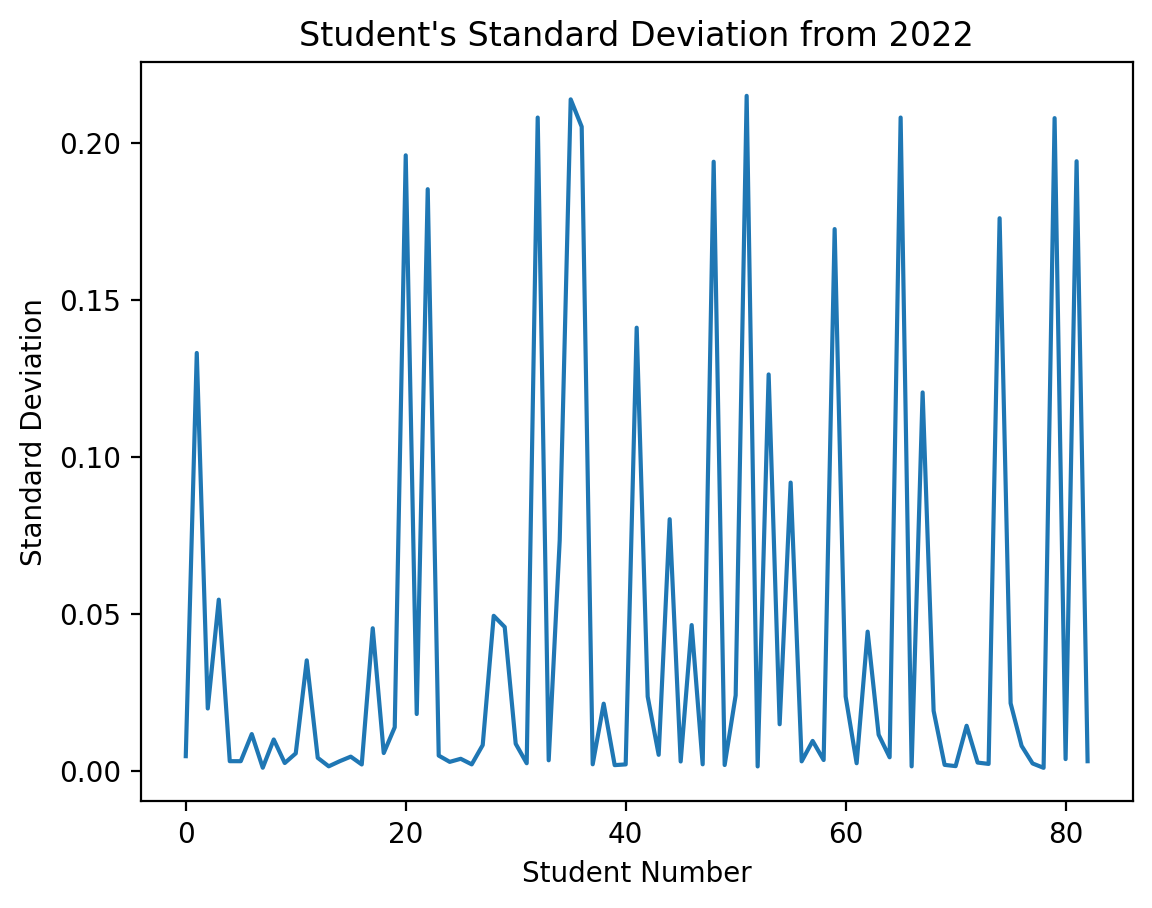

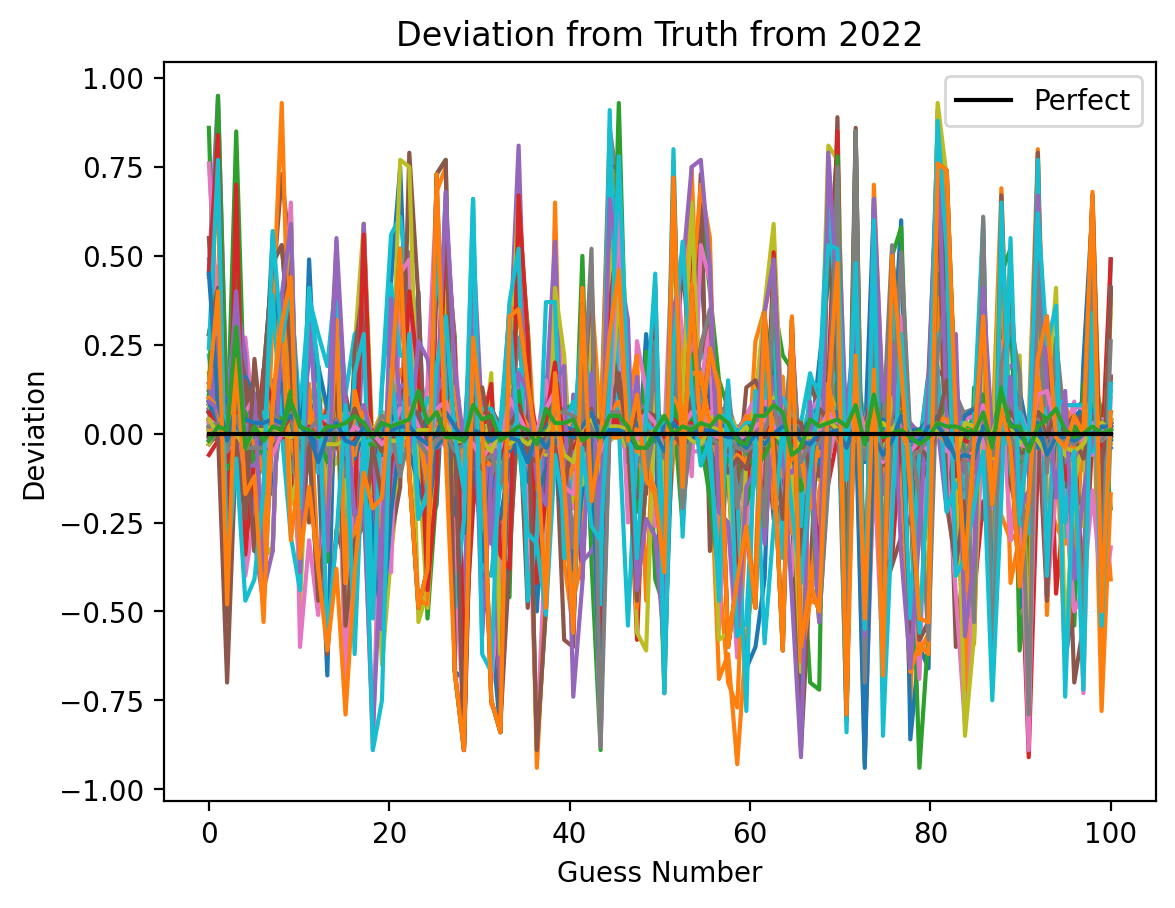

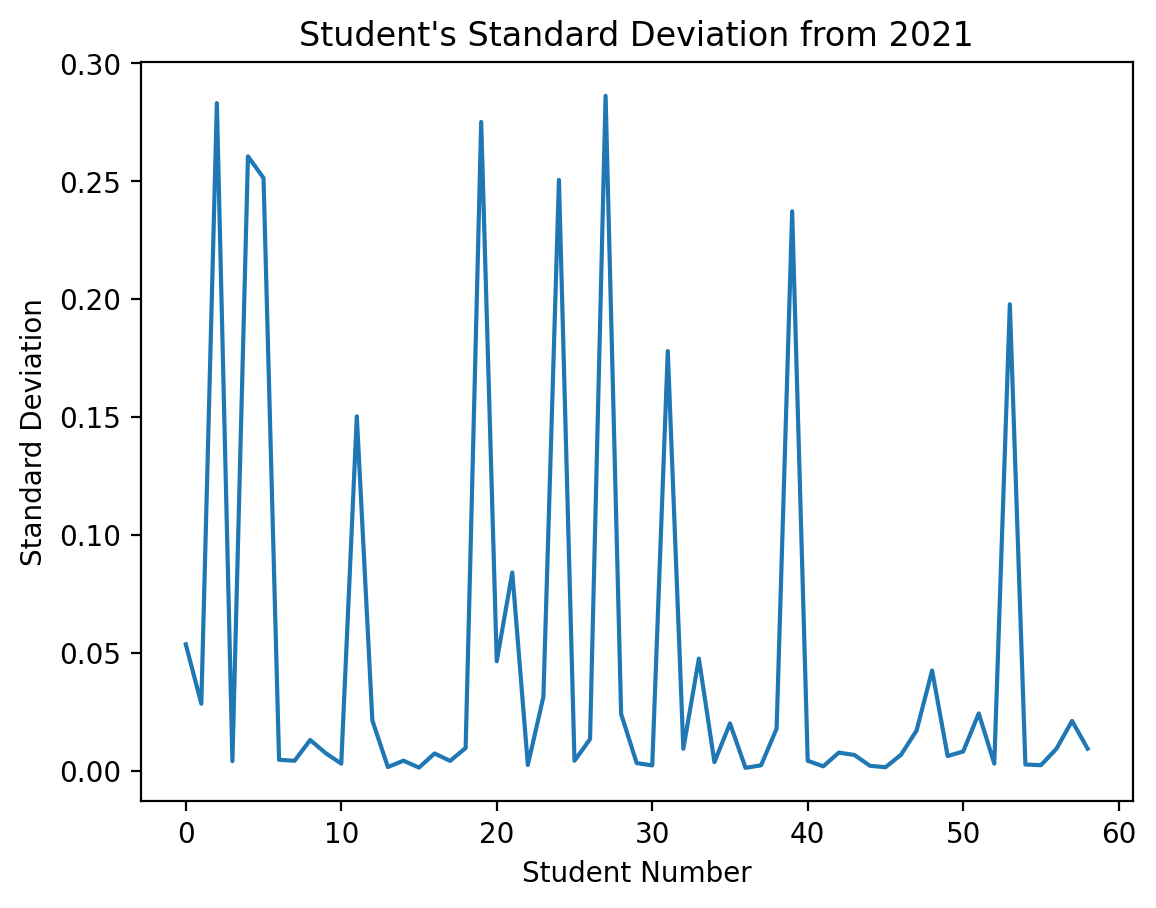

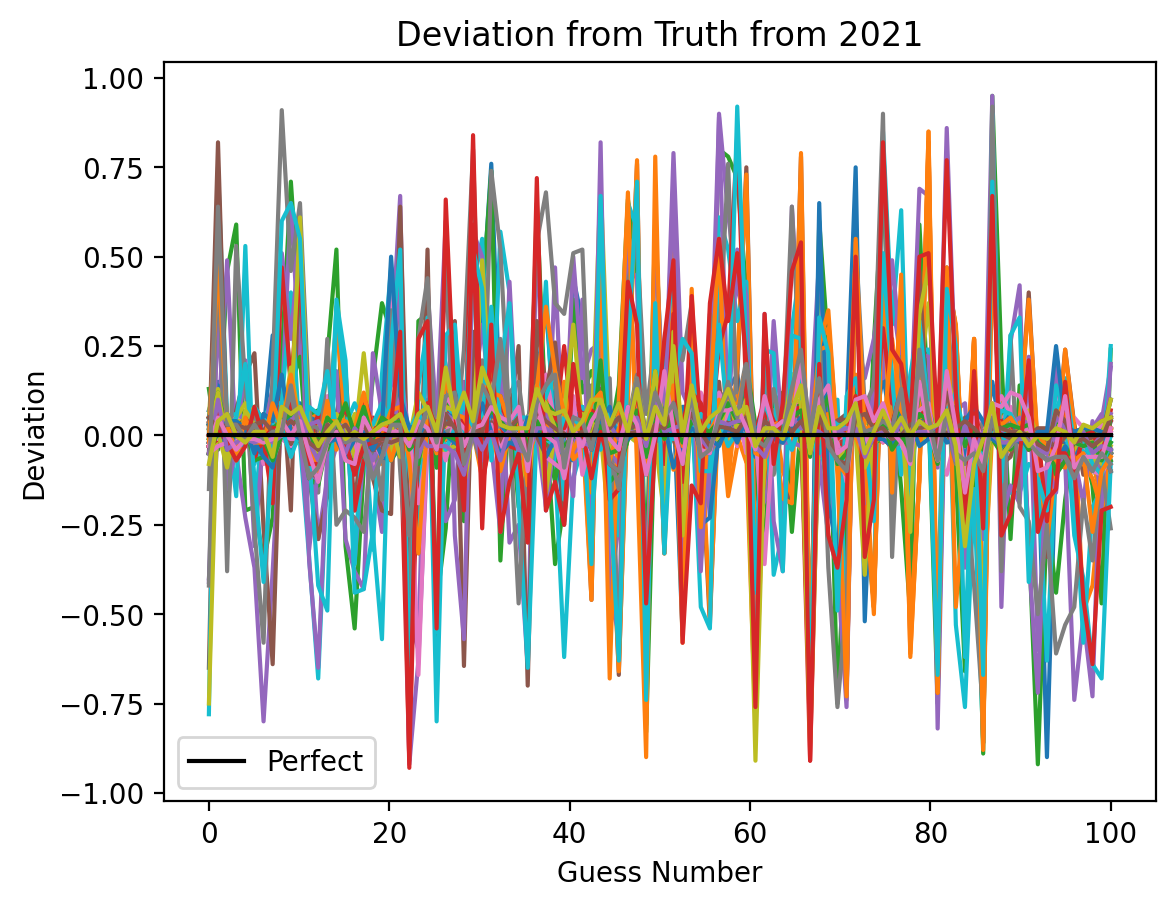

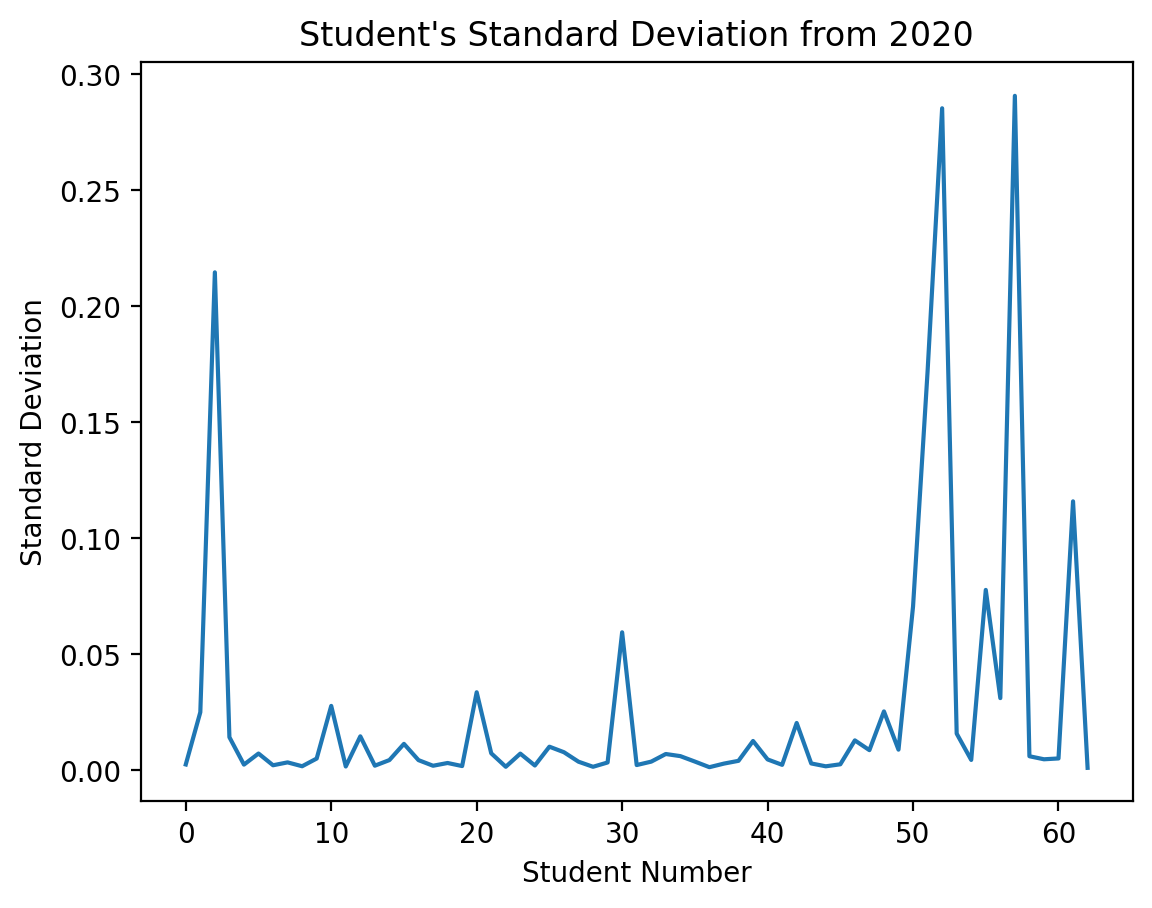

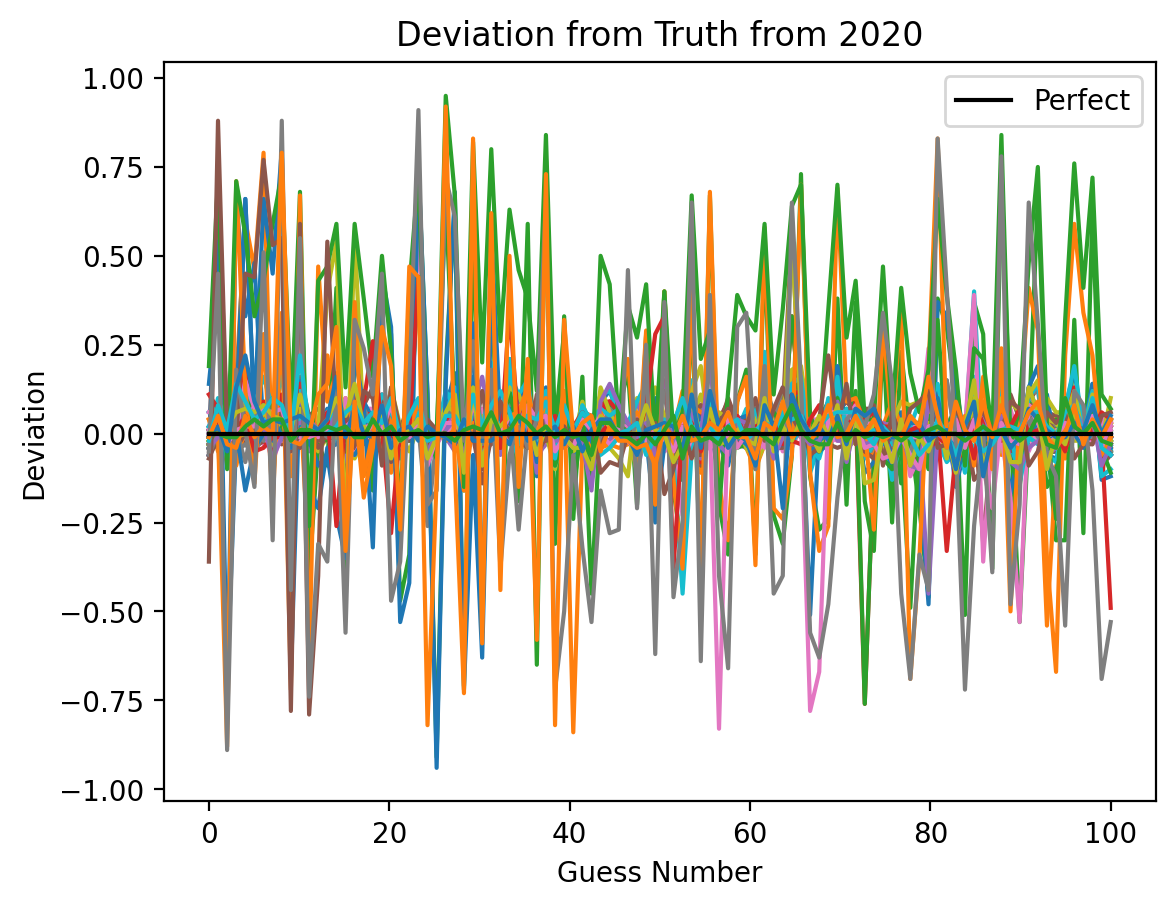

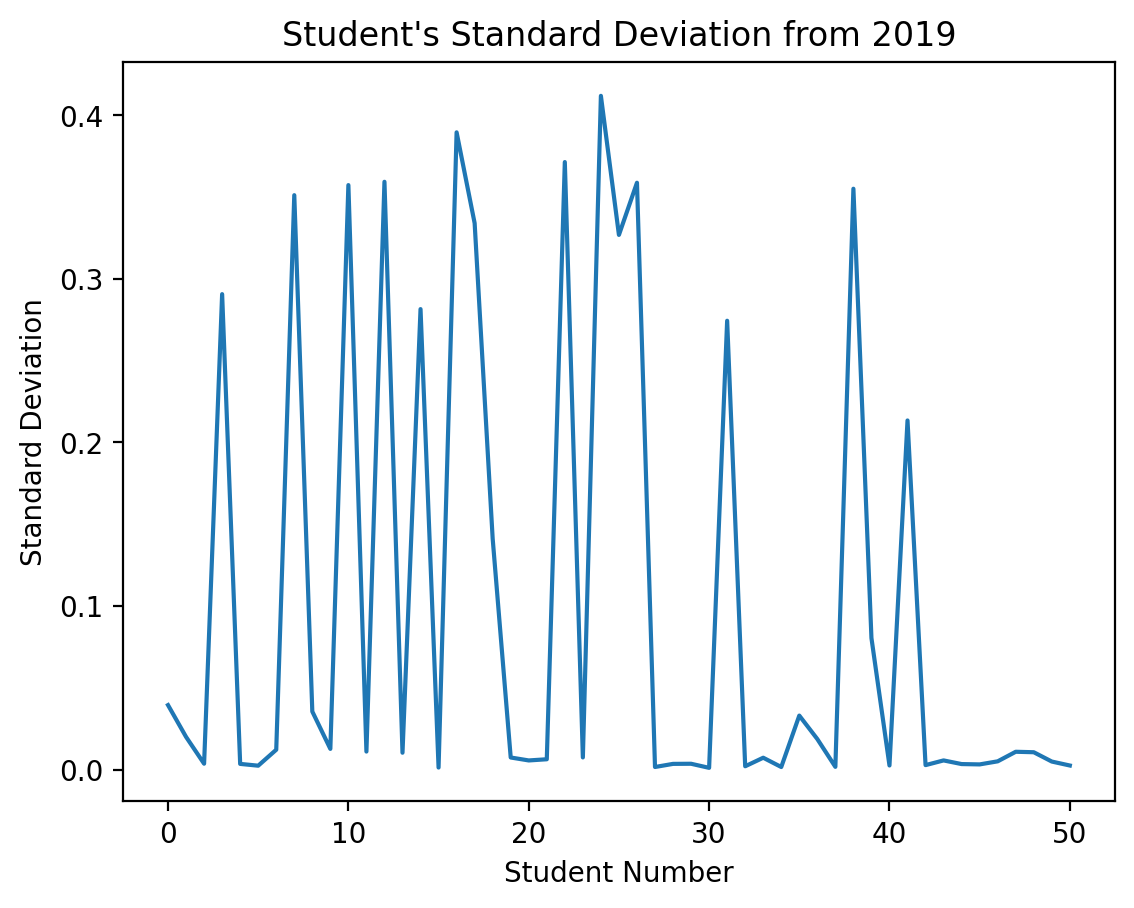

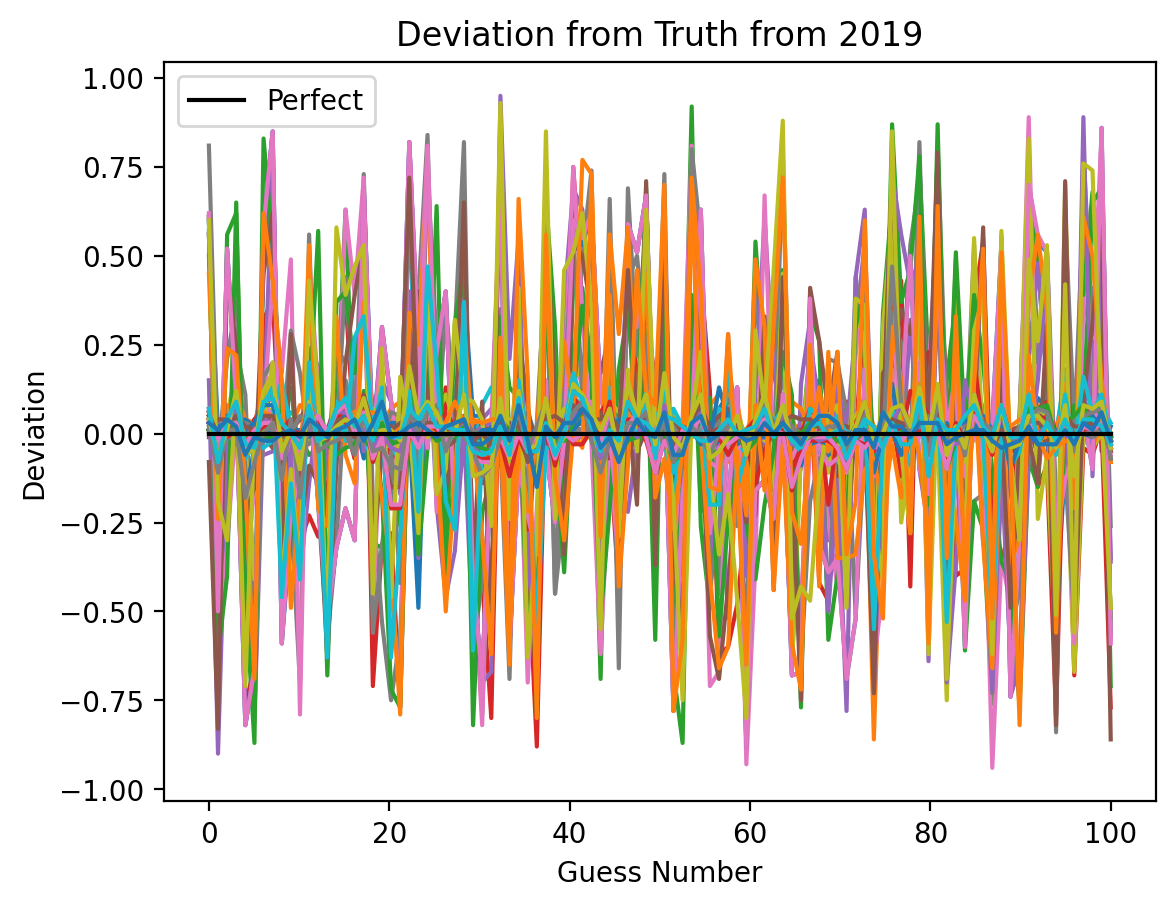

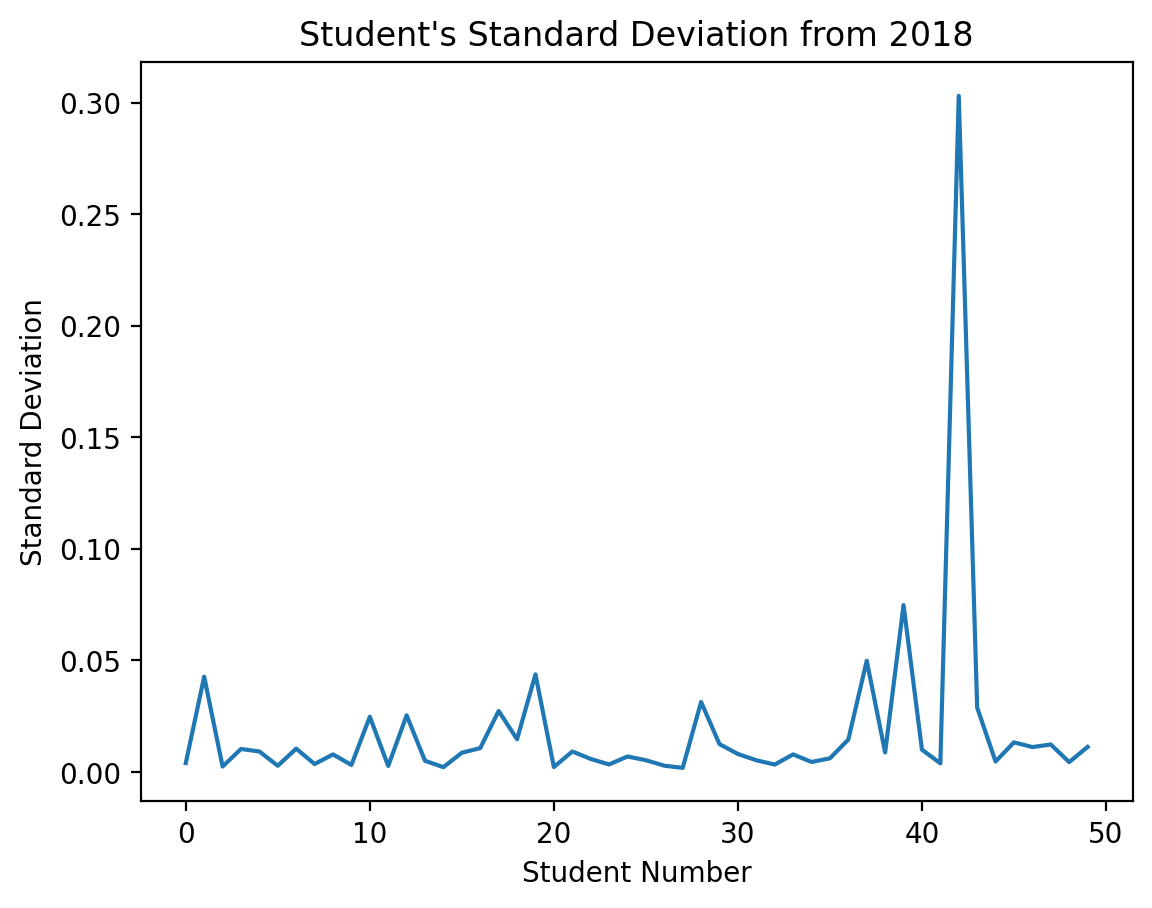

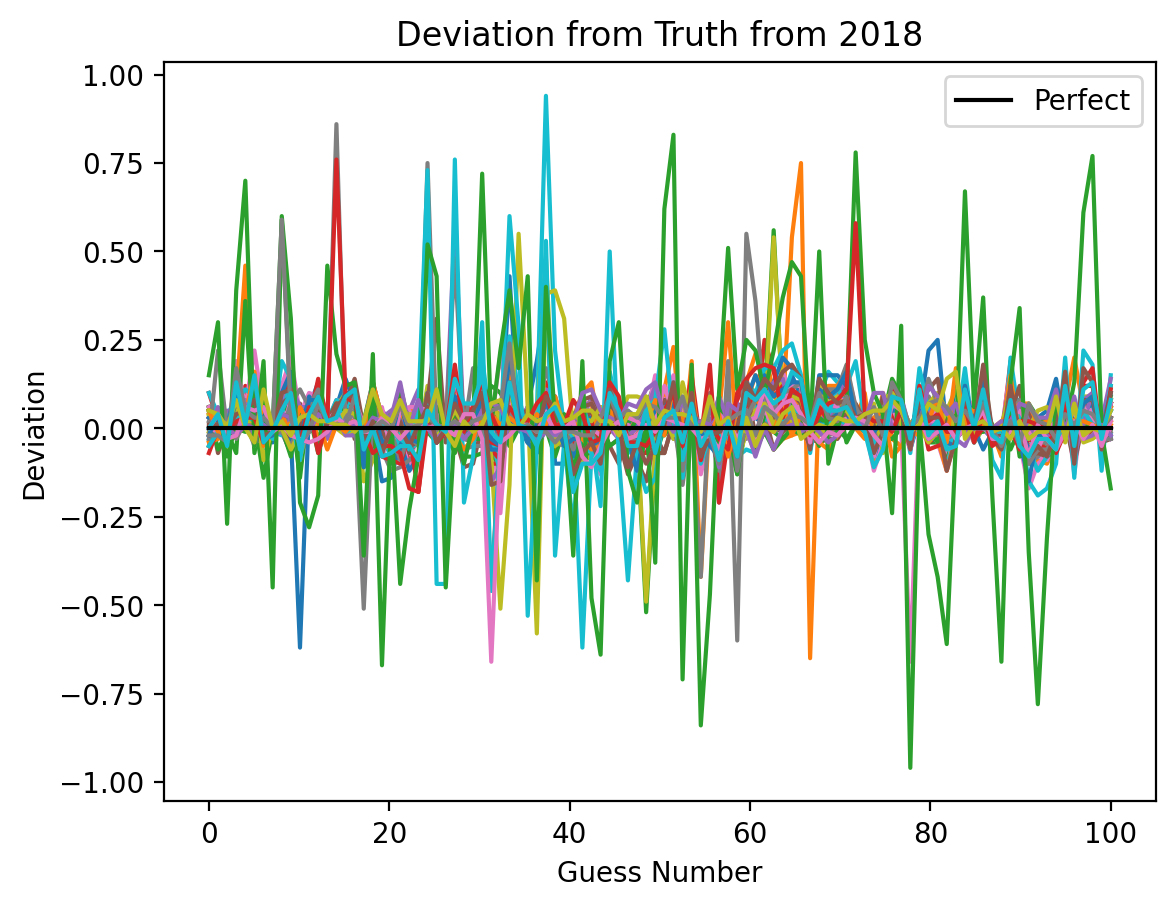

In [68]:
for year in subyears:
    differences = diff_dict[year]
    stds = stds_dict[year]      
    stds = np.array(stds)
    #print(stds)                                              #gives list of standard deviations for each class when it arrives are right year
    num_students = len(stds)
    plt.plot(stds)
    plt.title(f"Student's Standard Deviation from {year}")
    plt.xlabel('Student Number')
    plt.ylabel('Standard Deviation')
    plt.show()
    #plt.show()
    for values in differences:
        plt.plot(np.linspace(0, 100, 100), values)
    plt.title(f'Deviation from Truth from {year}')
    plt.xlabel('Guess Number')
    plt.ylabel('Deviation')
    plt.plot(np.linspace(0, 100, 100), np.zeros(100), c = 'black', label = 'Perfect')
    plt.legend()
    plt.show()

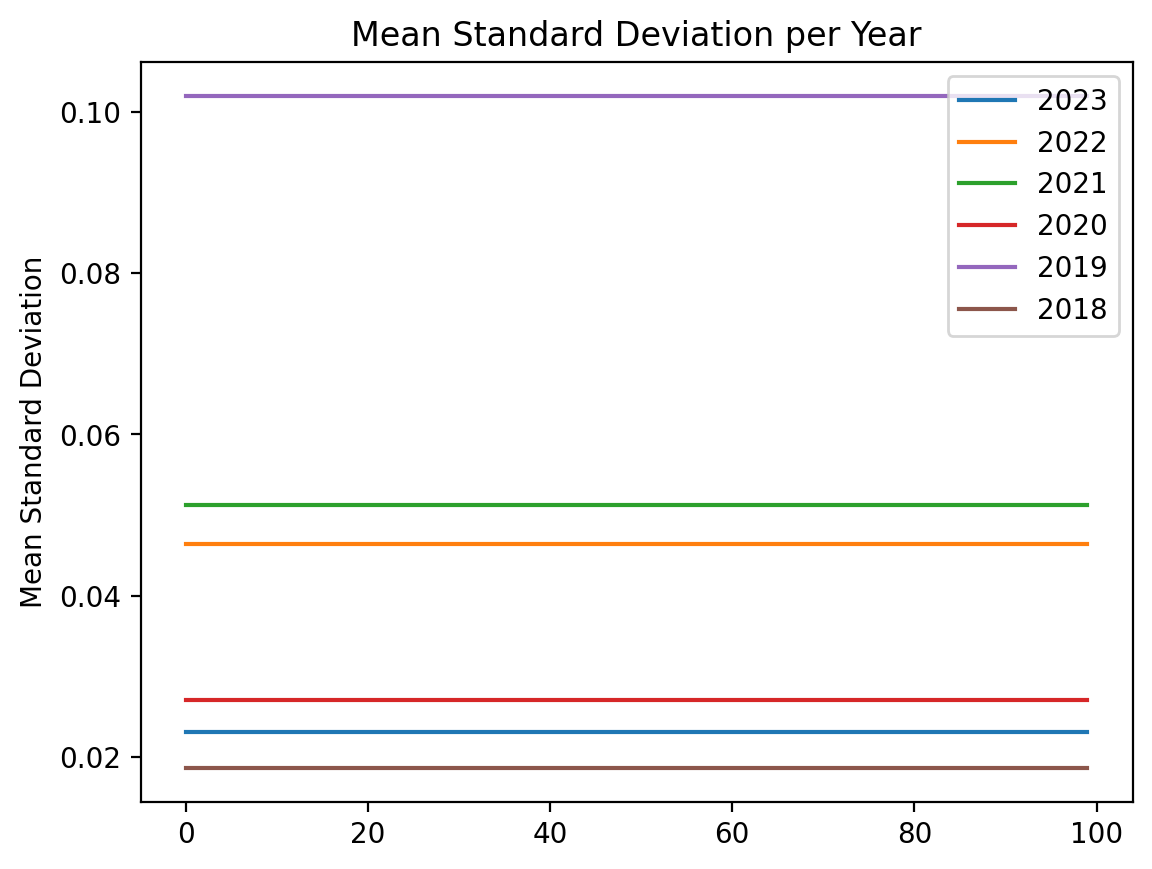

In [74]:
for year in subyears:
    stds = stds_dict[year]
    plt.plot(np.ones(100)*np.mean(stds), label = year)
plt.title('Mean Standard Deviation per Year')
plt.legend()
plt.ylabel('Mean Standard Deviation')
plt.show()

Comment: After anlaysis of each years data I beleive that 2018 was the most successful at guessing the position of each line. I make this conclusion from looking at both the standard deviation of each students and the deviation per guess for each plot. Notice that the 2018 plots show a greater concentration of deviations around 0 in comparison to those of other years. In addition to these plots, when looking at the mean standard deviation among each year, 2018 has by far the lowest mean. I beleive that maybe people have become lazier when putting in data or writing it down. One mistake in 100 points will cause for terrible trouble in deviaitons. Also upon consideration of the histograms below! The histograms show the greates majority of deviations around 0 in another way.

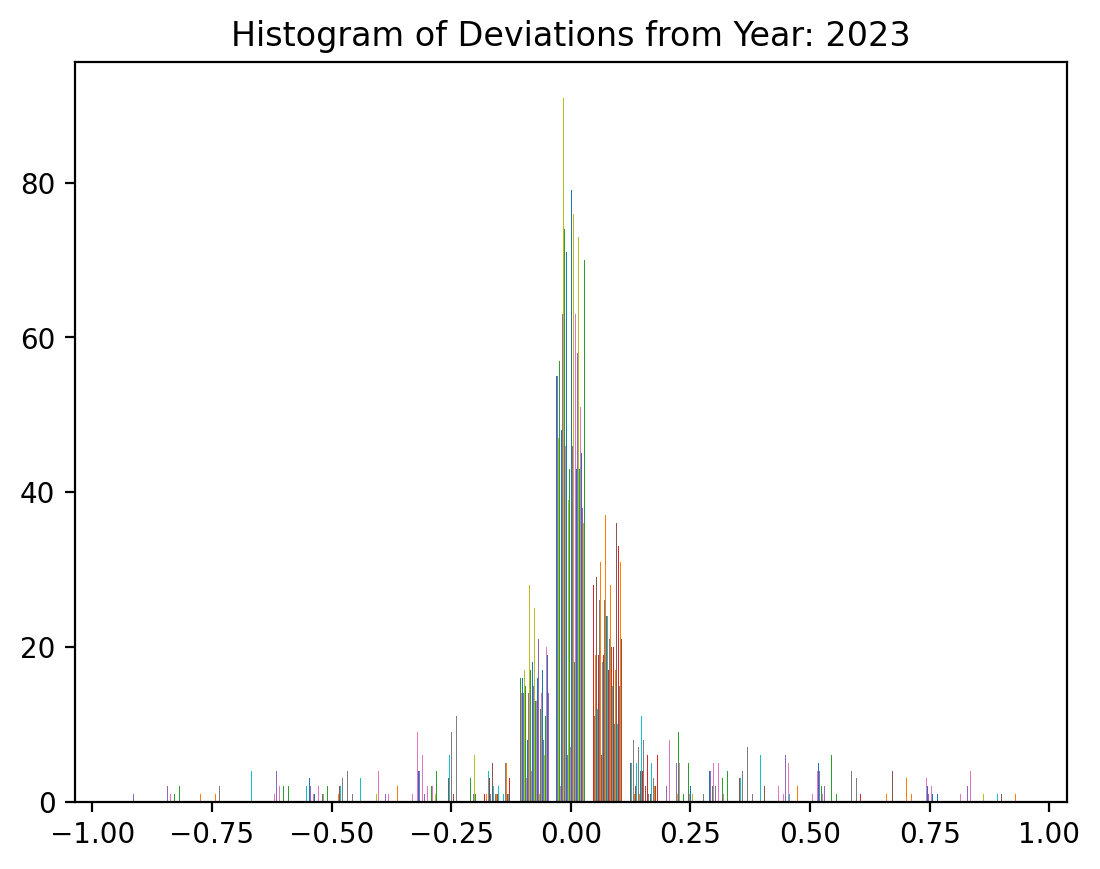

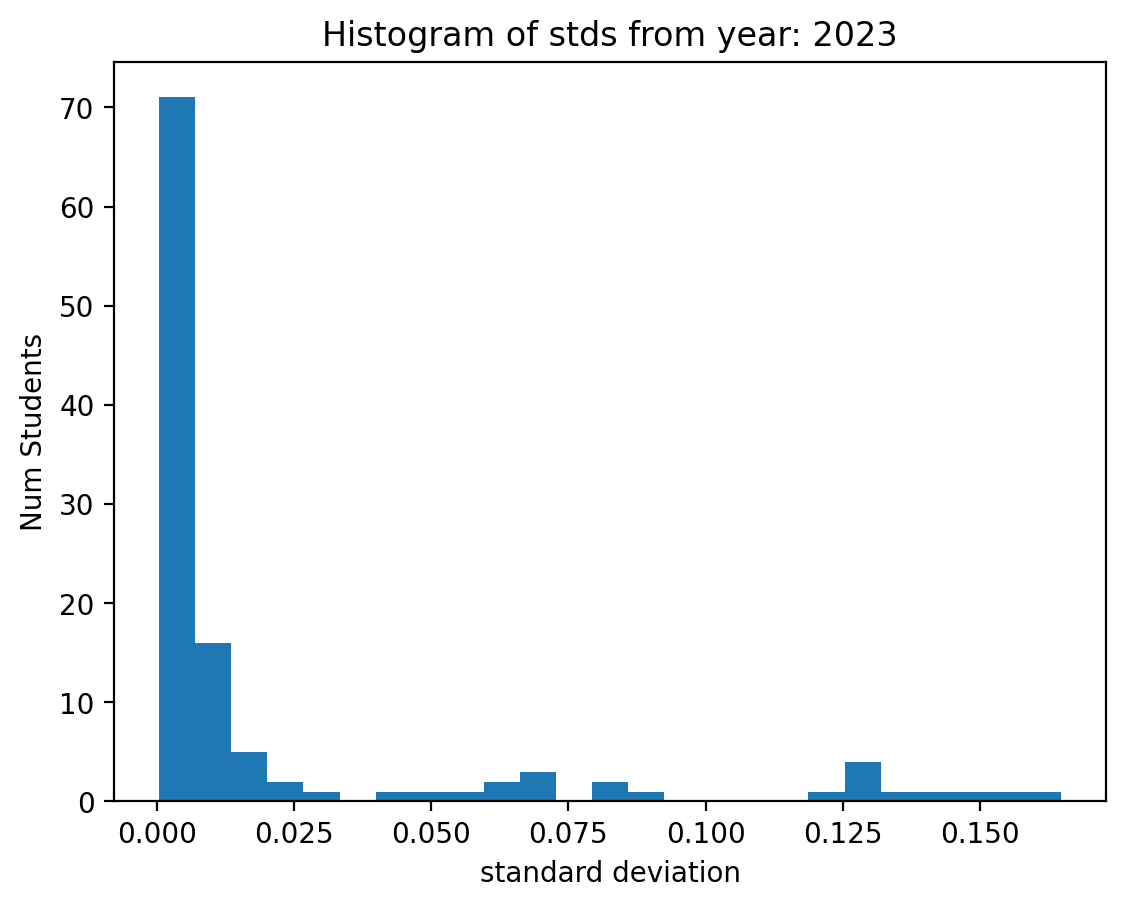

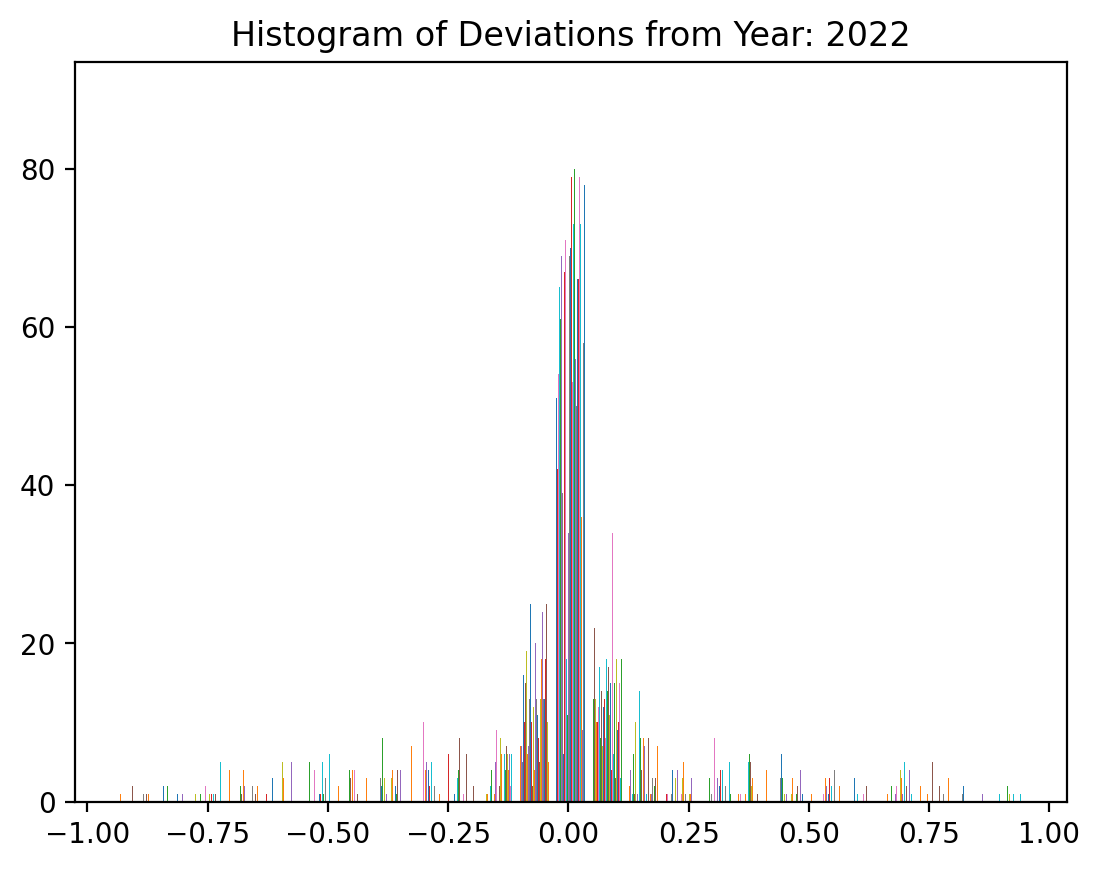

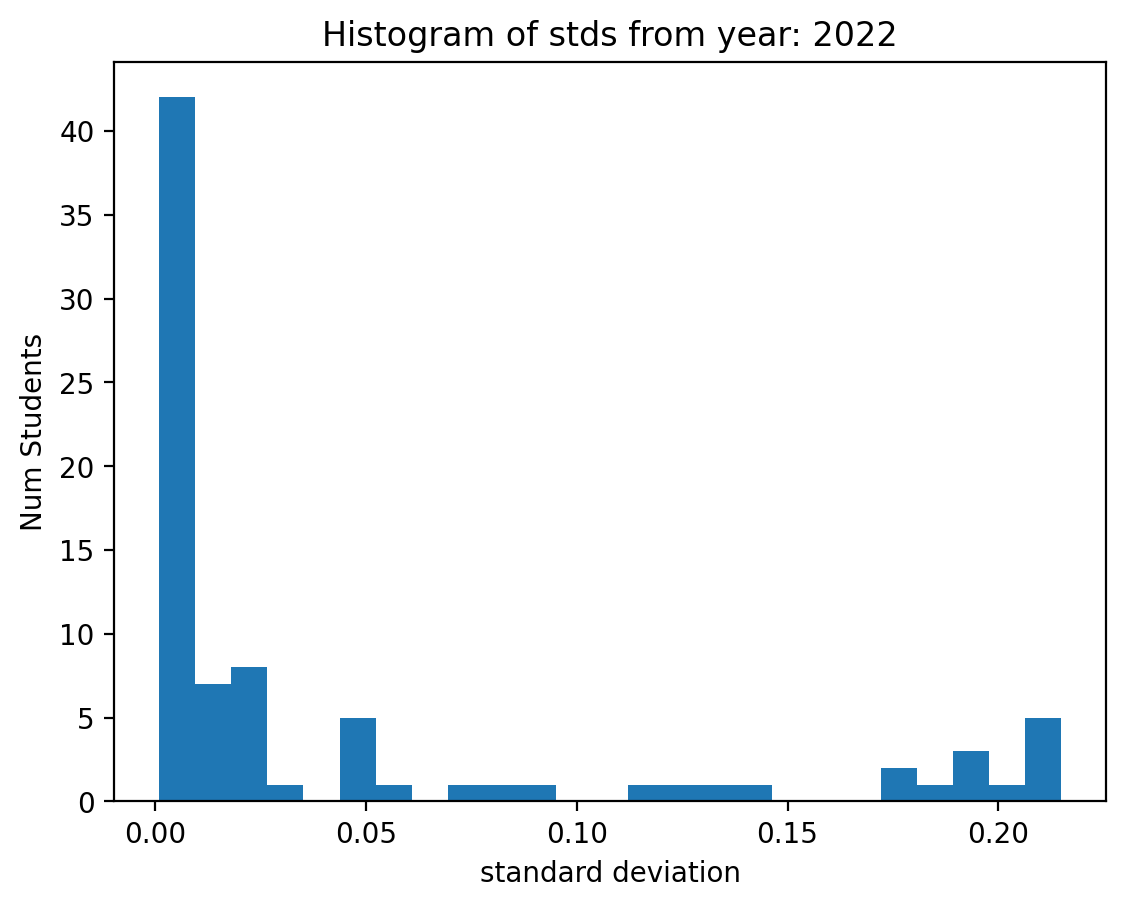

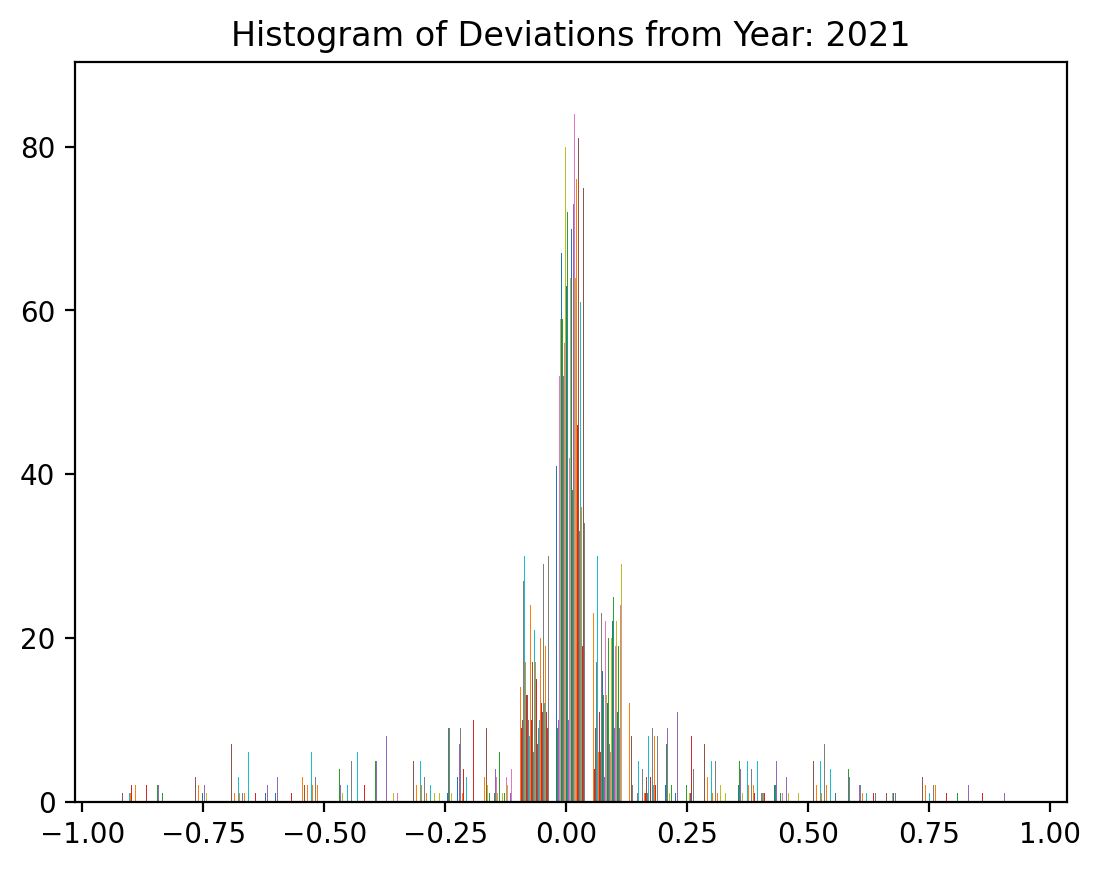

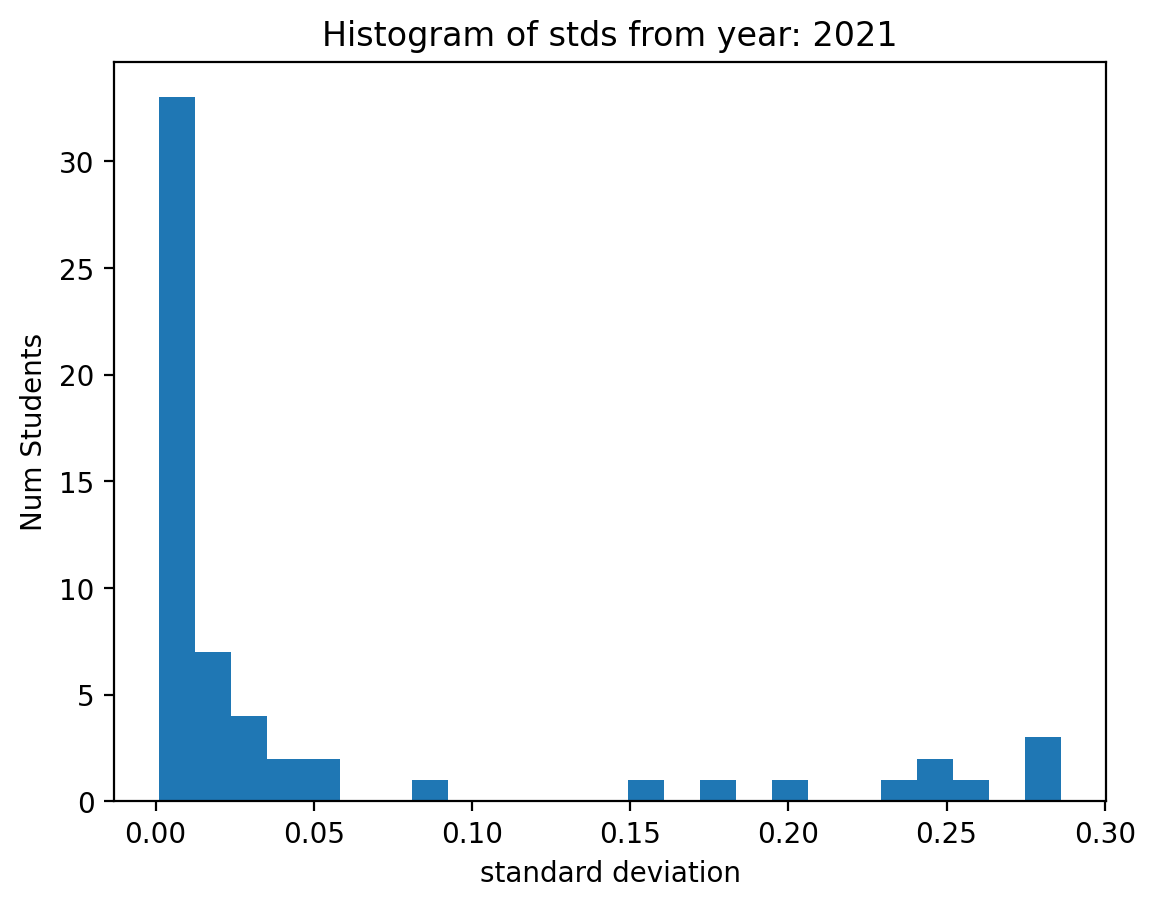

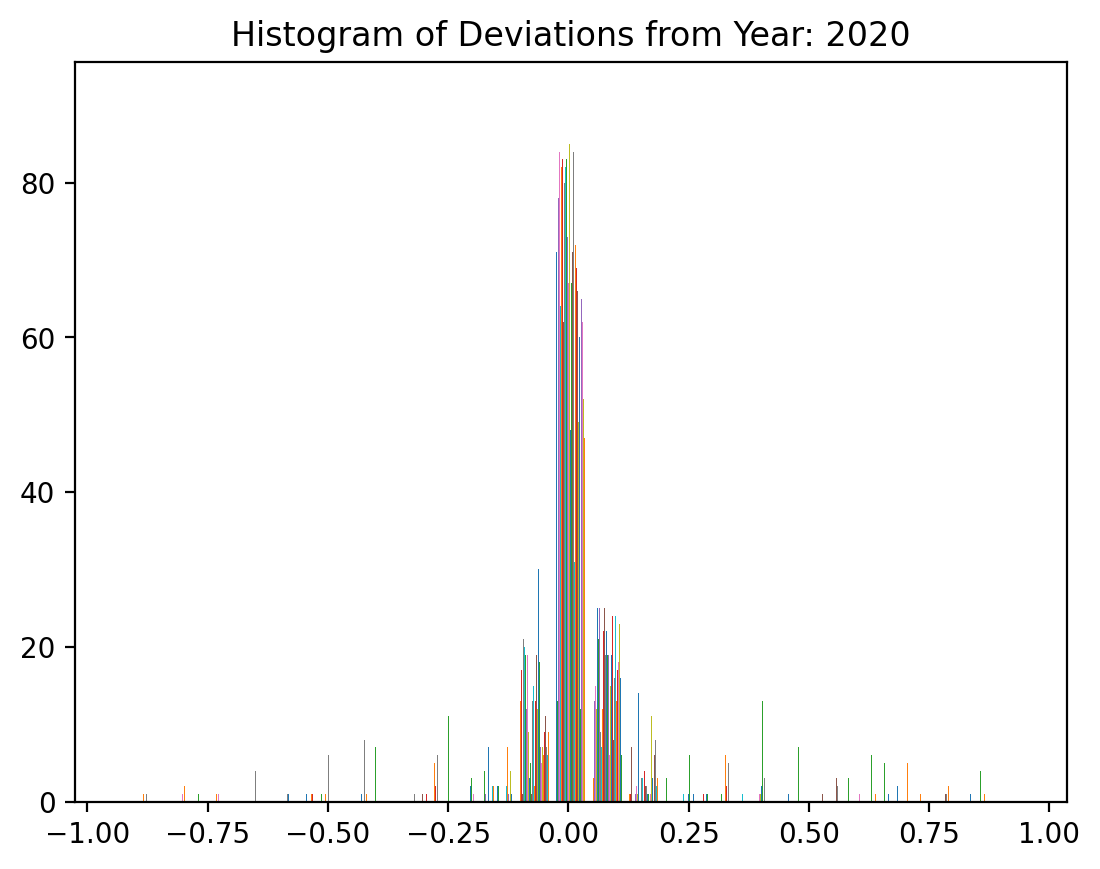

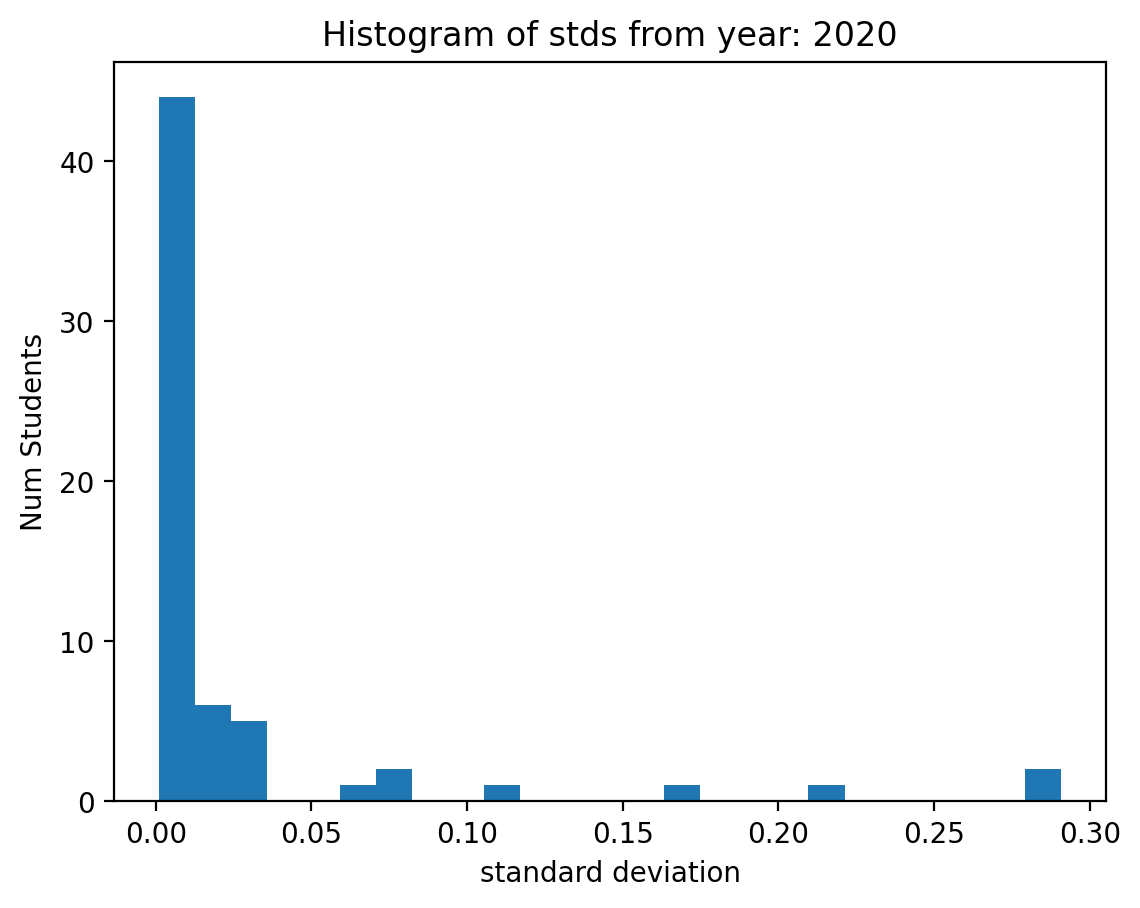

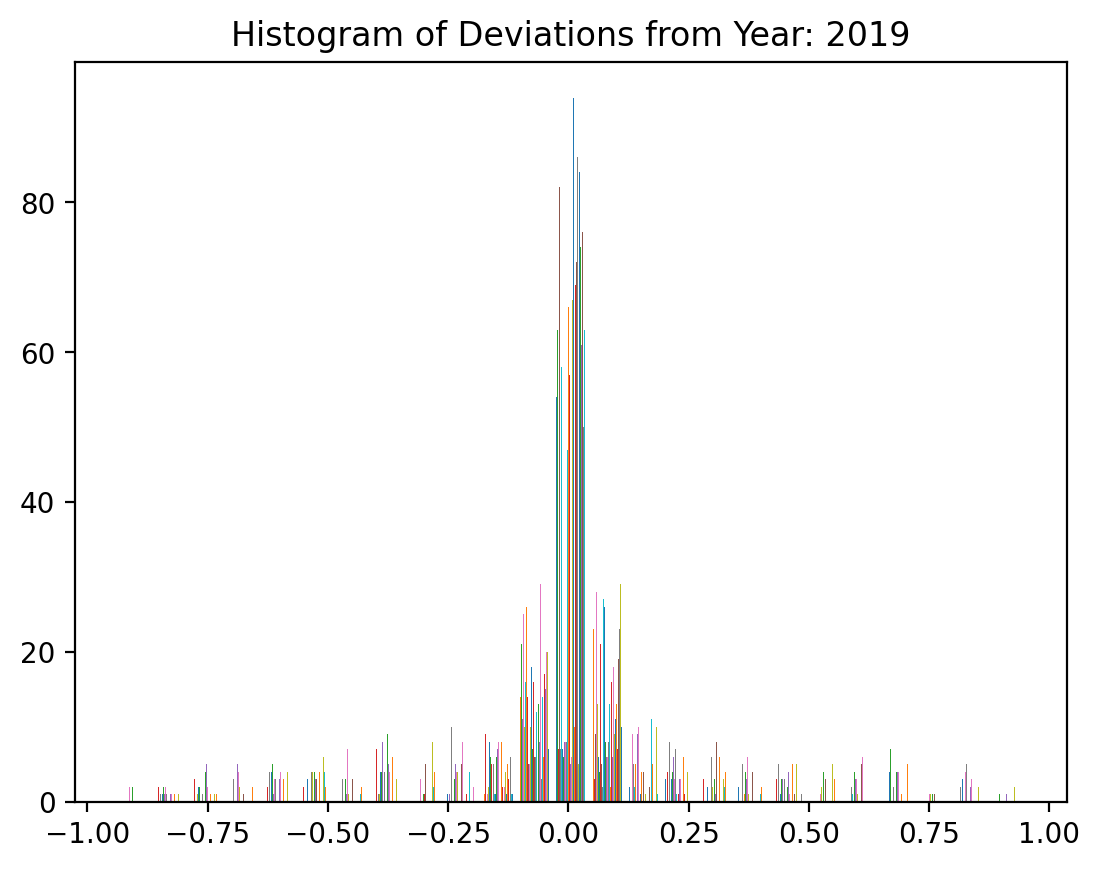

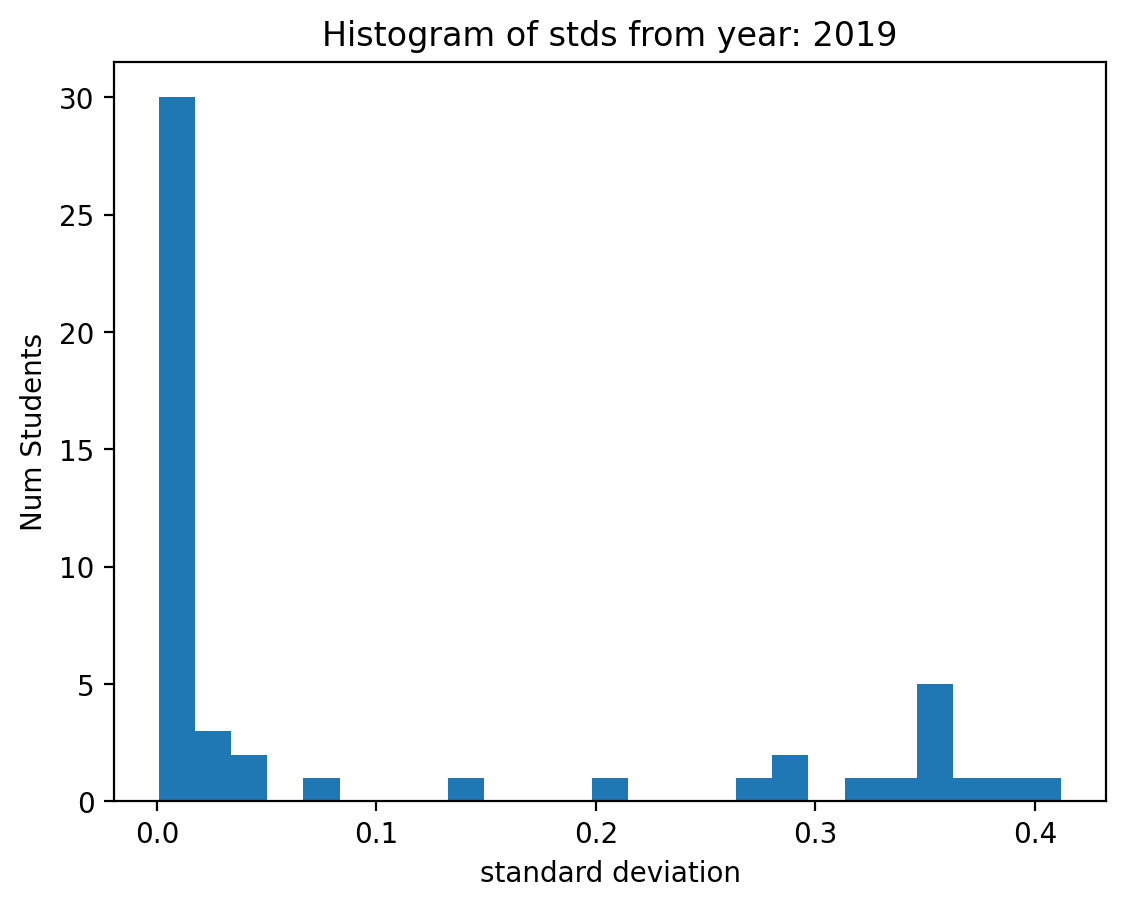

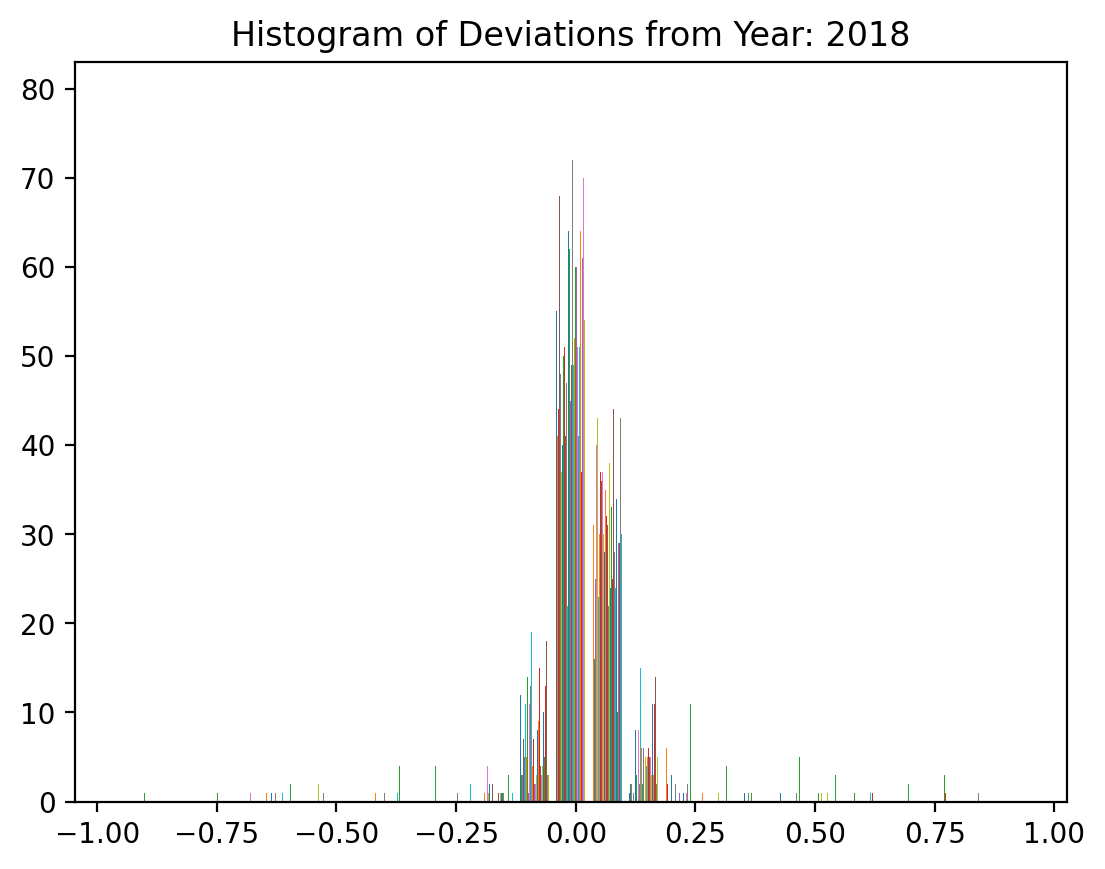

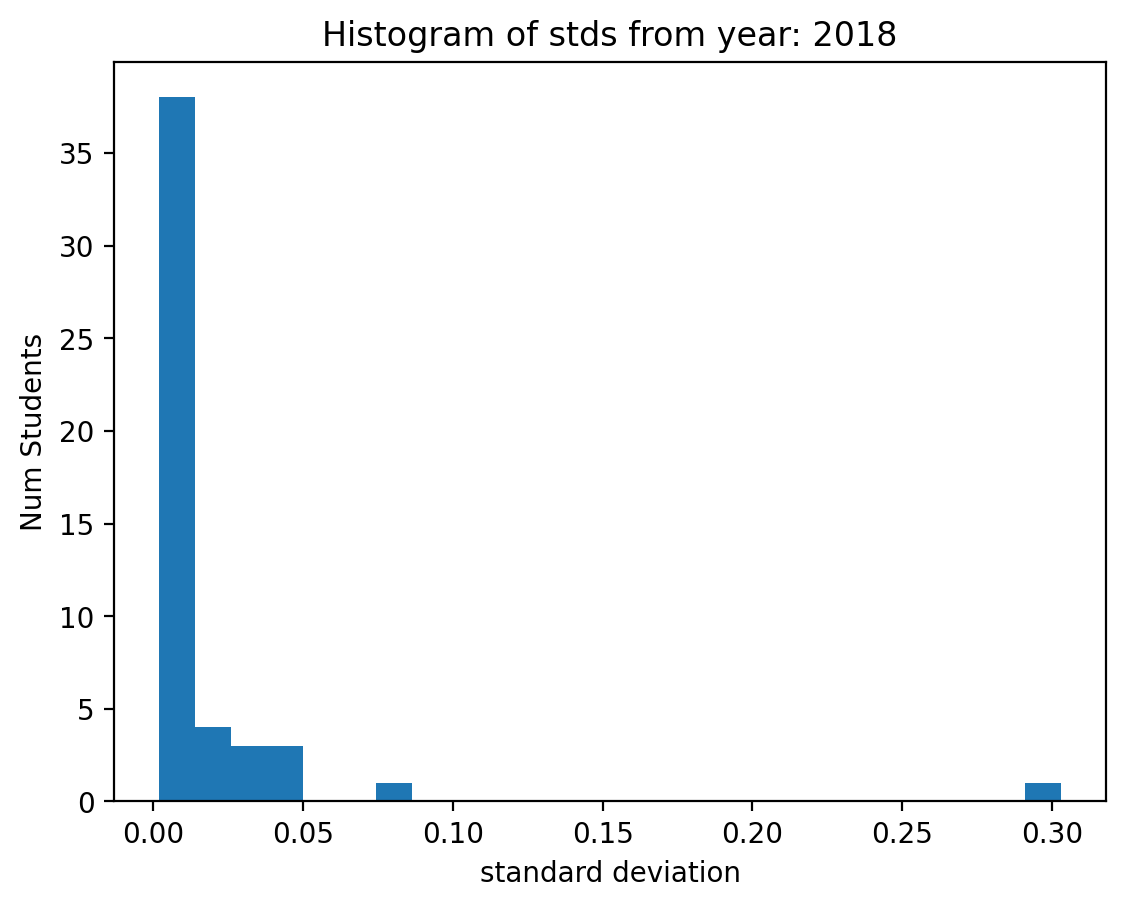

In [89]:
for year in subyears:
    differneces = diff_dict[year]
    stds = stds_dict[year]
    all_years_stds = []
    all_deviations = []
    for i in differneces:
        all_deviations.append(i)
    plt.hist(all_deviations, bins = 25)
    plt.title(f'Histogram of Deviations from Year: {year}')
    plt.show()
    for i in stds:
        all_years_stds.append(i)
    plt.hist(all_years_stds, bins = 25)
    plt.ylabel('Num Students')
    plt.xlabel('standard deviation')
    plt.title(f'Histogram of stds from year: {year}')
    plt.show()
